In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyodbc
from statsmodels.stats import weightstats as stests
plt.style.use('ggplot')
%matplotlib inline

In [2]:
sql = '''
SELECT distinct clm.portal_trans_id,
	   clm.portal_date,
	   clm.provider_id,
	   clm.member_code,
	   clm.policy_no,
	   clm.gender,
	   clm.physician_id,
	   clm.claim_date,
	   clm.CLAIM_TYPE,
	   clm.MAIN_SYMPTOM,
	   clm.TOT_CLM_GROSS_AMT,
	   clm.TOT_CLM_NET_AMT,
	   clm.general_status,
       clm.FRD_THREAD,
	   clm.claim_no,
	   clm.cover_code,
	   clm.benefit_cat,
	   clm.quotation_no,
	   clm.fraud_case,
	   serv.ICD_CODE
FROM [dbo].[tbl_Claims_Submissions] clm
left join [dbo].[tbl_claim_services] serv
on serv.PORTAL_TRANS_ID = clm.PORTAL_TRANS_ID
WHERE YEAR(clm.PORTAL_DATE) = 2019 
      AND (clm.FRAUD_CASE = 'Y' or clm.FRAUD_CASE = 'S')
       '''


In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=FDS;'
                      'Trusted_Connection=Yes;'
                      'Database=Fd_Stage;'
                      )

In [4]:
data = pd.read_sql(sql,conn)

In [5]:
data.head()

,portal_trans_id,portal_date,provider_id,member_code,policy_no,gender,physician_id,claim_date,CLAIM_TYPE,MAIN_SYMPTOM,TOT_CLM_GROSS_AMT,TOT_CLM_NET_AMT,general_status,FRD_THREAD,claim_no,cover_code,benefit_cat,quotation_no,fraud_case,ICD_CODE
0,460991805,2019-01-24 09:37:36,8584,004172544753001,15507764.0,None,6832,2018-12-06,O,Chief ComplaintsAssessPreviewSecHeaderStyleEnd...,2385.00,1889.75,N,NaN,NaN,117.0,1.0,13201034.0,S,None
1,460992667,2019-01-24 09:40:12,8584,002431840749101,15905842.0,None,8825,2018-12-16,O,Chief ComplaintsAssessPreviewSecHeaderStyleEnd...,2466.00,2080.50,N,NaN,NaN,117.0,1.0,13391889.0,S,None
2,460992749,2019-01-24 09:40:25,8584,002304228873003,15171934.0,None,11690,2018-12-16,O,Chief ComplaintsAssessPreviewSecHeaderStyleEnd...,2542.35,2097.73,N,NaN,NaN,125.0,1.0,12984238.0,S,None
3,460996883,2019-01-24 09:55:42,8584,001012854715101,201820192.0,None,12031,2018-12-30,O,Chief ComplaintsAssessPreviewSecHeaderStyleEnd...,1354.50,1092.75,N,NaN,NaN,16.0,1.0,13065918.0,S,None
4,460998306,2019-01-24 10:00:10,8584,001019438140201,132.0,None,4827,2018-12-29,O,Chief ComplaintsAssessPreviewSecHeaderStyleEnd...,431.05,284.84,P,NaN,103058.0,130.0,1.0,13409433.0,S,None


Text(0.5, 1.0, '')

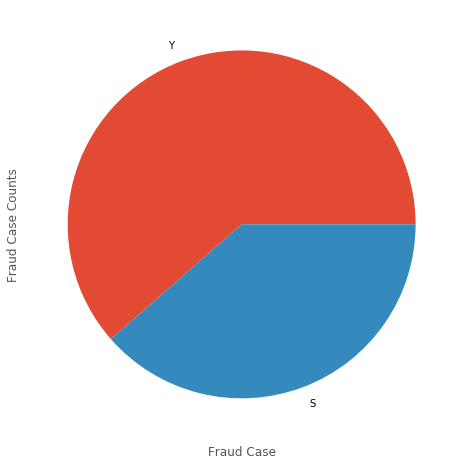

In [35]:
plt.figure(figsize=(15,8))
data.fraud_case.value_counts().plot(kind = 'pie')
plt.xlabel('Fraud Case')
plt.ylabel('Fraud Case Counts')
plt.title('')

Text(0.5, 1.0, 'Frauds Per Each Threat')

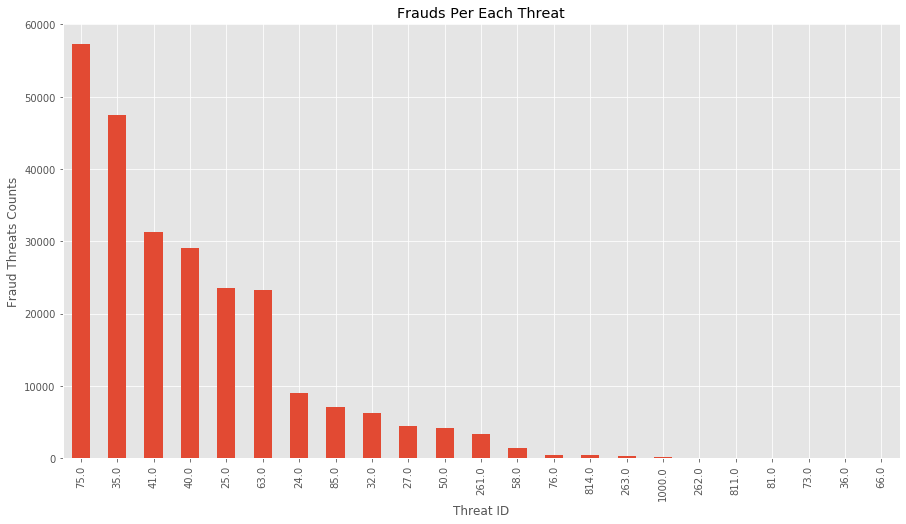

In [38]:
plt.figure(figsize=(15,8))
data.FRD_THREAD.value_counts().plot(kind = 'bar')
plt.xlabel('Threat ID')
plt.ylabel('Fraud Threats Counts')
plt.title('Frauds Per Each Threat')

Text(0.5, 1.0, 'Frauds Per each Provider (Top 30)')

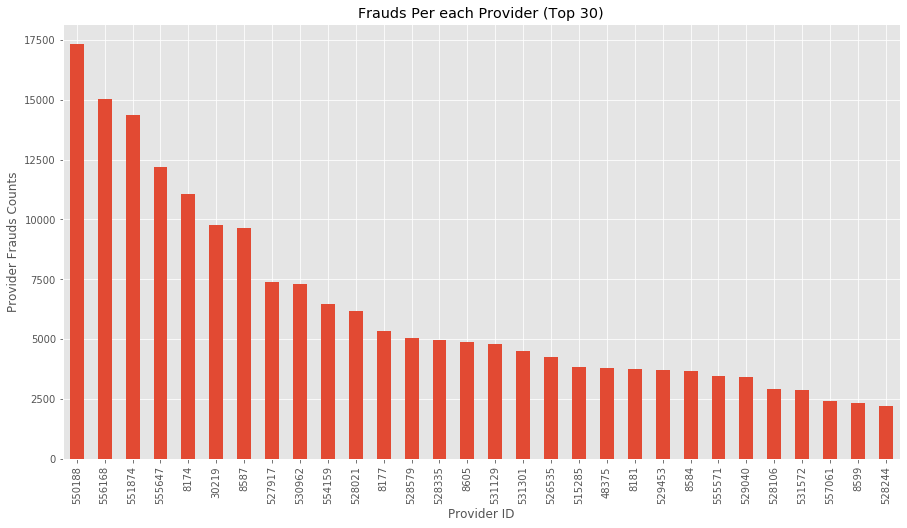

In [27]:
plt.figure(figsize=(15,8))
data.provider_id.value_counts()[:30].plot(kind = 'bar')
plt.xlabel('Provider ID')
plt.ylabel('Provider Frauds Counts')
plt.title('Frauds Per each Provider (Top 30)')

Text(0.5, 1.0, 'Frauds Per each Benefit Category')

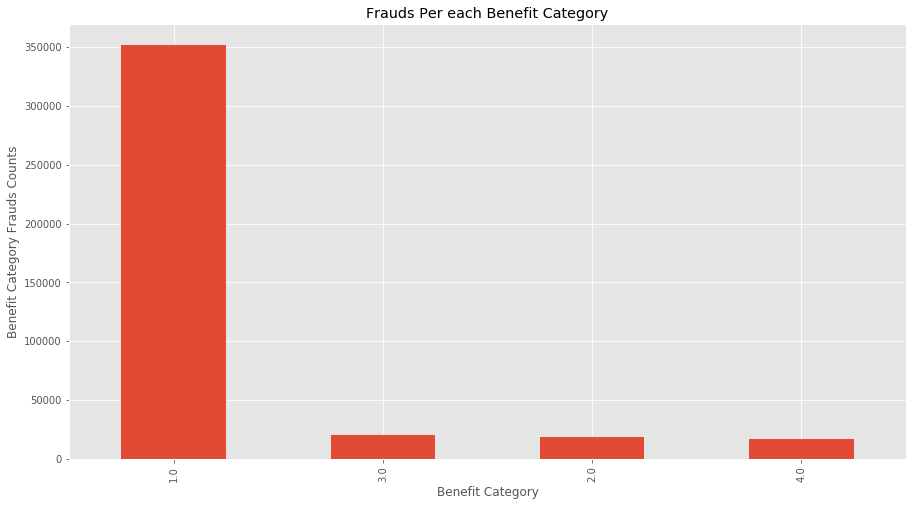

In [9]:
plt.figure(figsize=(15,8))
data.benefit_cat.value_counts().plot(kind = 'bar')
plt.xlabel('Benefit Category')
plt.ylabel('Benefit Category Frauds Counts')
plt.title('Frauds Per each Benefit Category')

Text(0.5, 1.0, 'Frauds Per each Claim Type')

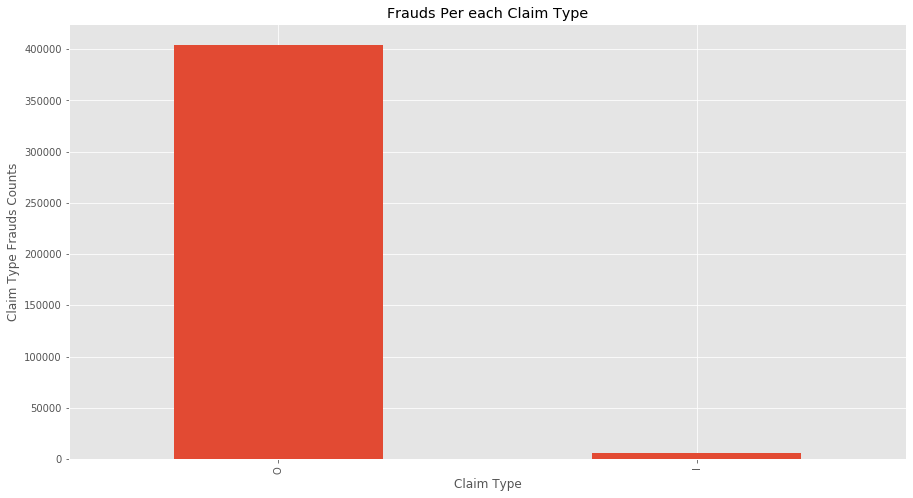

In [10]:
plt.figure(figsize=(15,8))
data.CLAIM_TYPE.value_counts().plot(kind = 'bar')
plt.xlabel('Claim Type')
plt.ylabel('Claim Type Frauds Counts')
plt.title('Frauds Per each Claim Type')

In [11]:
data.policy_no = data.policy_no.astype(int)

Text(0.5, 1.0, 'Frauds Per each Policy Number (Top 20)')

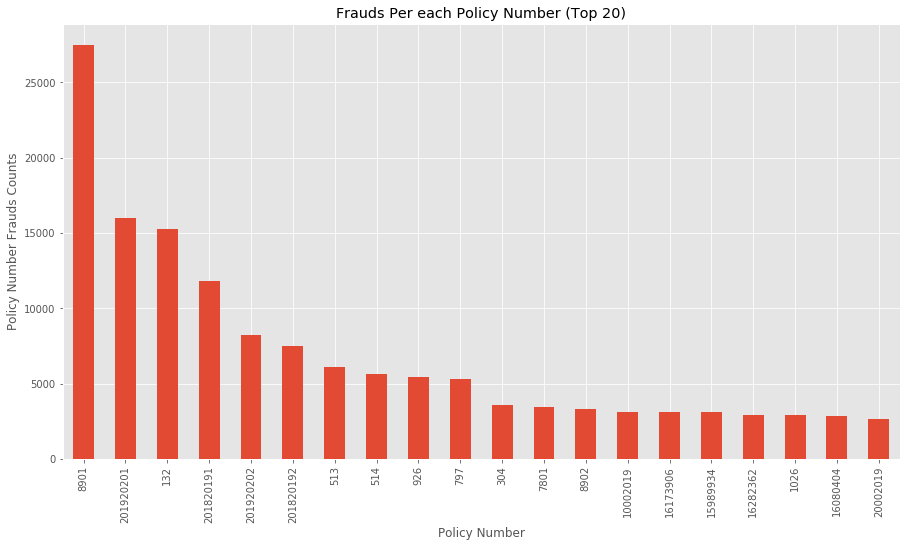

In [12]:
plt.figure(figsize=(15,8))
data.policy_no.value_counts()[:20].plot(kind='bar')
plt.xlabel('Policy Number')
plt.ylabel('Policy Number Frauds Counts')
plt.title('Frauds Per each Policy Number (Top 20)')

In [13]:
data.TOT_CLM_NET_AMT[data.TOT_CLM_NET_AMT>0].mean(),stats.hmean(data.TOT_CLM_NET_AMT[data.TOT_CLM_NET_AMT >0])

(841.8864157041871, 45.068639321240916)

In [14]:
max(data.TOT_CLM_NET_AMT),min(data.TOT_CLM_NET_AMT)

(905619.68, -1350.0)

Text(0.5, 1.0, 'Frauds Per each ICD CODE (Top 20)')

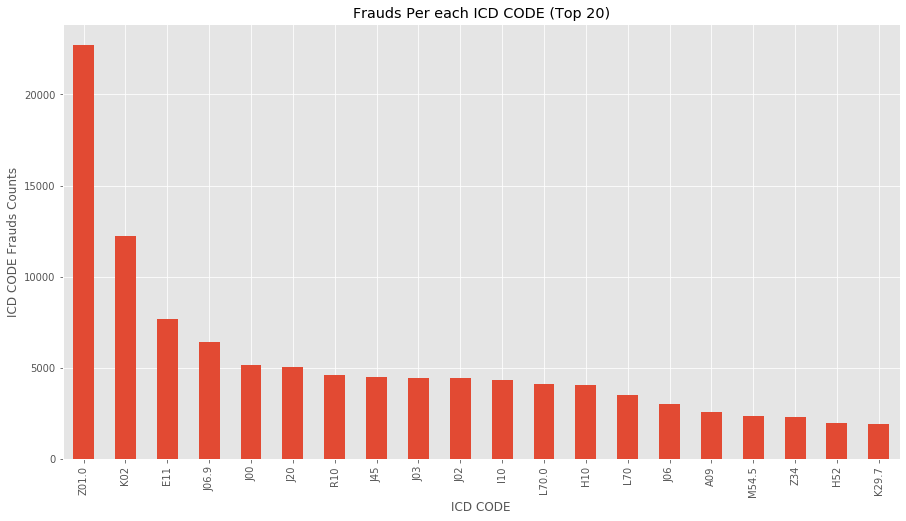

In [15]:
plt.figure(figsize=(15,8))
data.ICD_CODE.value_counts()[:20].plot(kind='bar')
plt.xlabel('ICD CODE')
plt.ylabel('ICD CODE Frauds Counts')
plt.title('Frauds Per each ICD CODE (Top 20)')

In [16]:
data.claim_date = pd.to_datetime(data.claim_date,errors = 'coerce')
data.portal_date = pd.to_datetime(data.portal_date,errors = 'coerce')

In [17]:
data.groupby([data.portal_date.dt.month])['TOT_CLM_NET_AMT'].sum().astype(int)

portal_date
1     10496382
2     72856523
3     60034691
4     19075582
5      8460387
6     13675408
7     15931290
8     14884402
9     15070443
10    21274677
11    29730025
12    61026361
Name: TOT_CLM_NET_AMT, dtype: int32

([<matplotlib.axis.XTick at 0x19a189c8>,
 <a list of 12 Text xticklabel objects>)

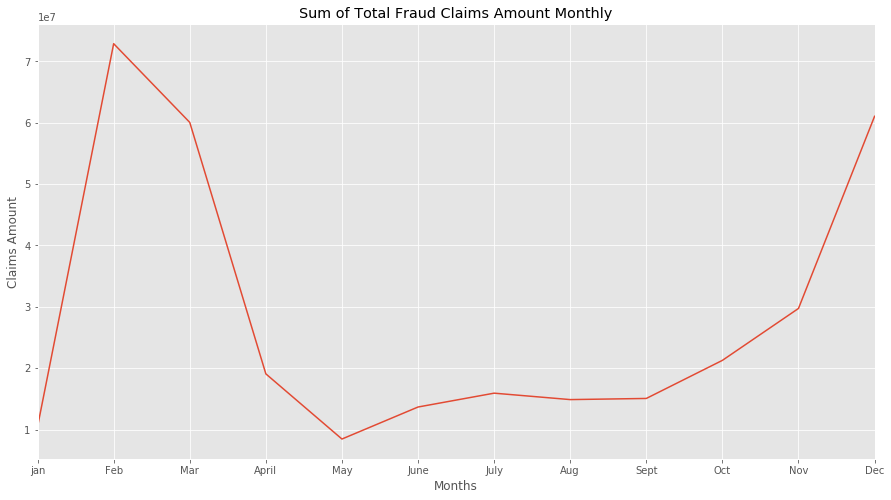

In [18]:
plt.figure(figsize=(15,8))

data.groupby([data.portal_date.dt.month])['TOT_CLM_NET_AMT'].sum().astype(int).plot.line()
plt.title("Sum of Total Fraud Claims Amount Monthly")
plt.ylabel('Claims Amount')
plt.xlabel('Months')
plt.xticks([i for i in range(1,13)],['jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])

([<matplotlib.axis.XTick at 0x198e7a48>,
 <a list of 12 Text xticklabel objects>)

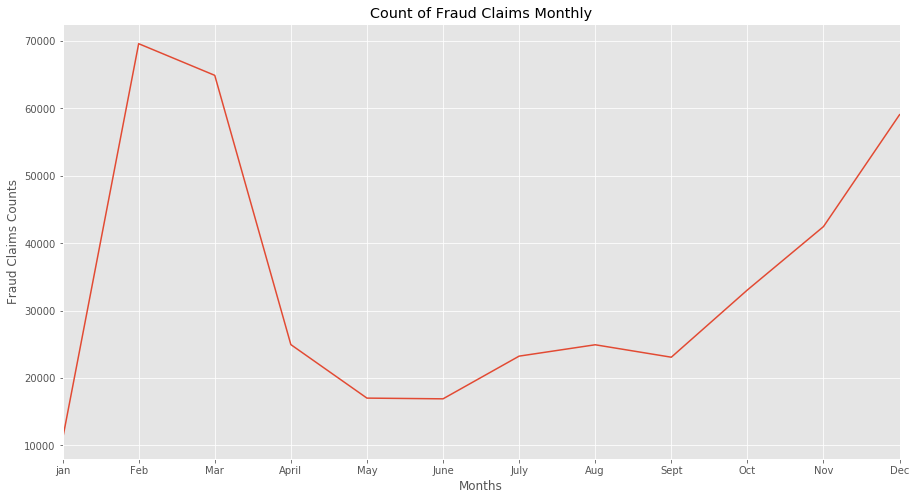

In [19]:
plt.figure(figsize=(15,8))
data.groupby([data.portal_date.dt.month])['portal_trans_id'].count().astype(int).plot.line()
plt.title("Count of Fraud Claims Monthly")
plt.ylabel('Fraud Claims Counts')
plt.xlabel('Months')
plt.xticks([i for i in range(1,13)],['jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec'])

Text(0.5, 1.0, 'Frauds For each Physician')

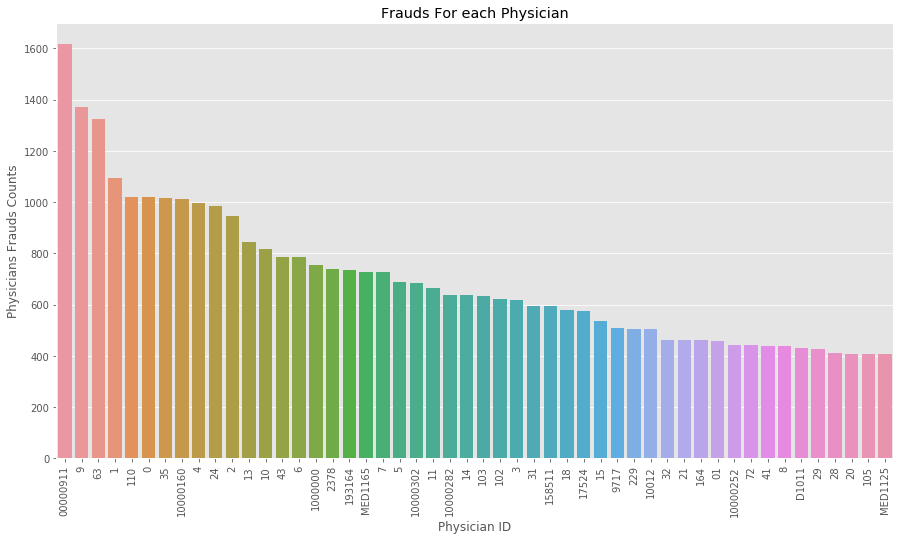

In [52]:
plt.figure(figsize=(15,8))
#data.physician_id.value_counts()[:50].plot(kind = 'bar')
sns.barplot(x=data.physician_id.value_counts()[:50].index,y=data.physician_id.value_counts()[:50].values)
plt.xlabel('Physician ID')
plt.ylabel('Physicians Frauds Counts')
plt.xticks(rotation=90)
plt.title('Frauds For each Physician')

In [2]:
sql = '''
SELECT 
       [policy_no]
      ,[Claim_Date]
      ,[provider_id]
      ,[portal_trans_id]
      ,[Portal_date]
      ,[batch_ref]
      ,[member_code]
      ,[tot_clm_net_amt]
      ,[thread_id]
      ,[det_Action_Type]
  FROM [FD].[dbo].[vw_allDetails]
  where year(Claim_Date) = 2019'''

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=FDS;'
                      'Trusted_Connection=Yes;'
                      'Database=FD;'
                      )

In [4]:
data = pd.read_sql(sql,conn)

In [5]:
data.head()

,policy_no,Claim_Date,provider_id,portal_trans_id,Portal_date,batch_ref,member_code,tot_clm_net_amt,thread_id,det_Action_Type
0,132.0,2019-02-12,8175,M54507489,2019-02-12,-1,001059013050001,100.00,58,A
1,304.0,2019-04-25,8175,M56313039,2019-04-25,-1,001000834299001,451.64,25,A
2,16280336.0,2019-05-04,8175,M55910159,2019-05-04,-1,001079353338001,4128.42,25,A
3,16678583.0,2019-09-07,8175,M57890180,2019-09-07,-1,002113287557001,861.07,25,A
4,16038723.0,2019-05-17,8175,M56131200,2019-05-17,-1,001066603265001,0.00,24,A


Text(0, 0.5, 'Counts per Action Type')

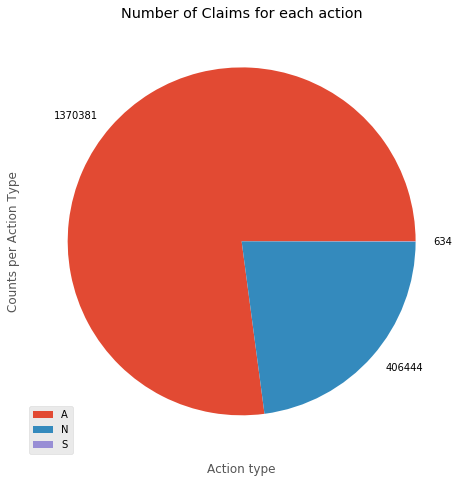

In [6]:
plt.figure(figsize=(15,8))
ax = data.det_Action_Type.value_counts().plot.pie(labels=data.det_Action_Type.value_counts())
plt.title("Number of Claims for each action")
ax.legend(loc=3,labels=data.det_Action_Type.value_counts().index)
plt.xlabel('Action type')
plt.ylabel('Counts per Action Type')

Text(0, 0.5, 'Claims Total Amount')

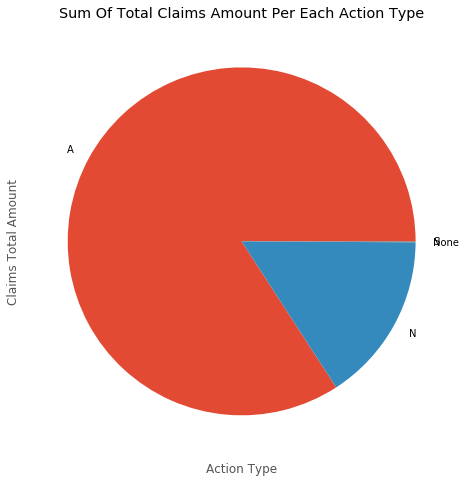

In [144]:
plt.figure(figsize=(15,8))
data.groupby(['det_Action_Type'])['tot_clm_net_amt'].sum().plot.pie()
plt.title('Sum Of Total Claims Amount Per Each Action Type')
plt.xlabel('Action Type')
plt.ylabel('Claims Total Amount')

C:\Users\Eman\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


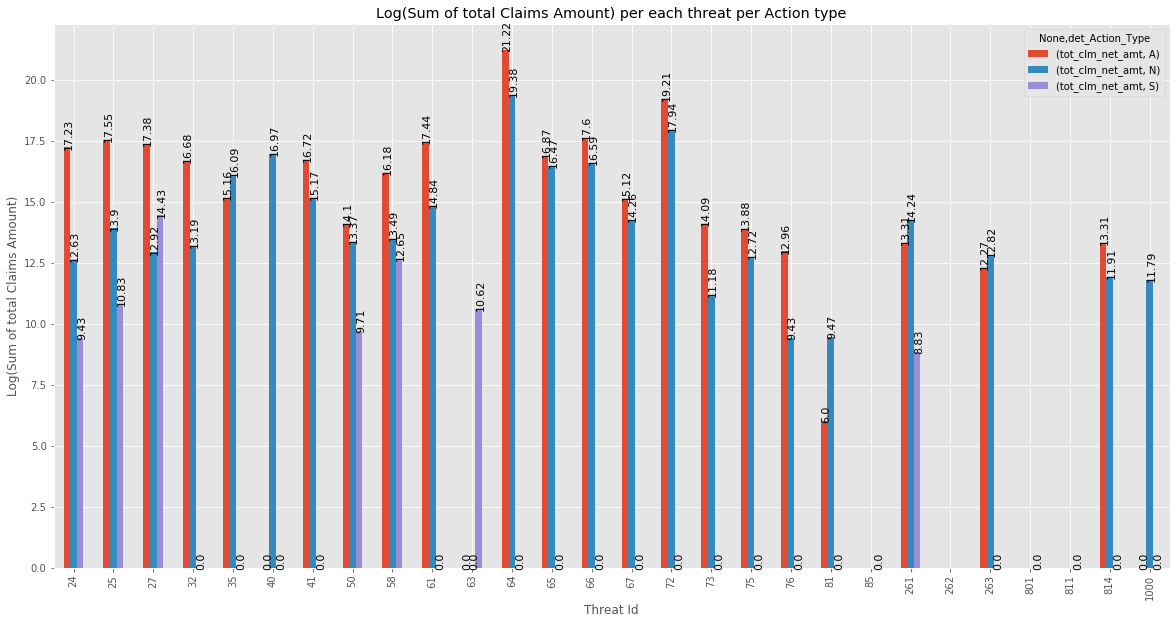

In [8]:
ax = pd.DataFrame(np.log(data.groupby(['thread_id','det_Action_Type'])['tot_clm_net_amt'].sum())).unstack().plot.bar()
plt.gcf().set_size_inches(20,10)
for p in ax.patches:
    ax.annotate(p.get_height().round(2),(p.get_x(),p.get_height()),rotation=90,ha='left',fontsize=11)
    plt.ylabel('Log(Sum of total Claims Amount)')
plt.xlabel('Threat Id')
plt.title('Log(Sum of total Claims Amount) per each threat per Action type')
plt.show()


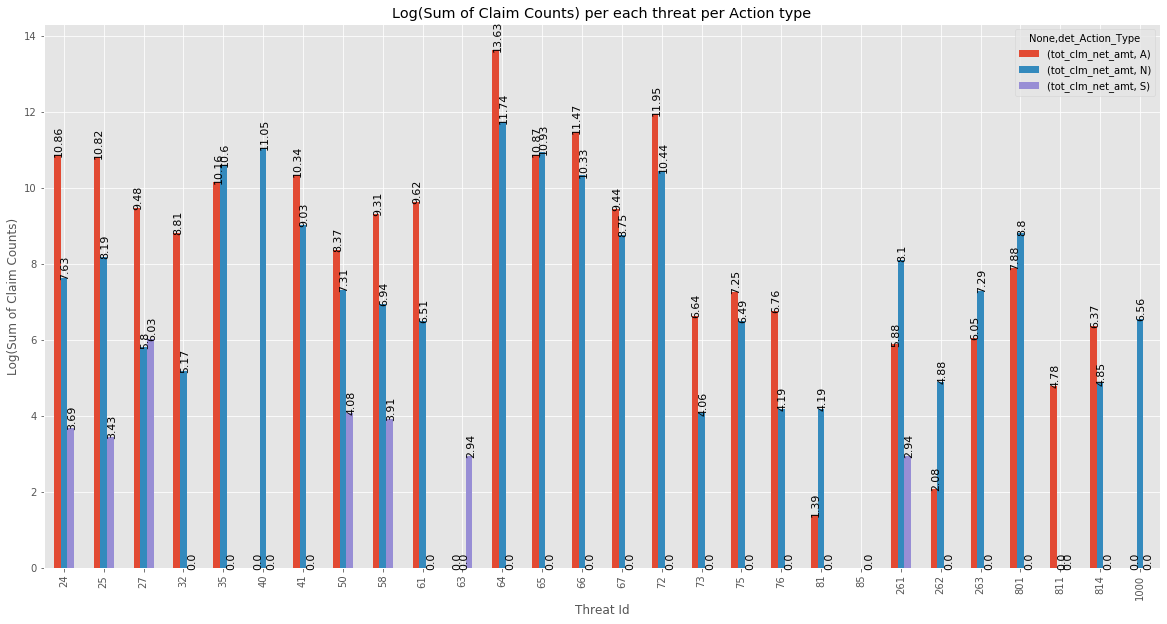

In [9]:
ax = pd.DataFrame(np.log(data.groupby(['thread_id','det_Action_Type'])['tot_clm_net_amt'].count())).unstack().plot.bar()
plt.gcf().set_size_inches(20,10)
for p in ax.patches:
    ax.annotate(p.get_height().round(2),(p.get_x(),p.get_height()),rotation=90,ha='left',fontsize=11)
    plt.ylabel('Log(Sum of Claim Counts)')
plt.xlabel('Threat Id')
plt.title('Log(Sum of Claim Counts) per each threat per Action type')
plt.show()


C:\Users\Eman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Eman\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


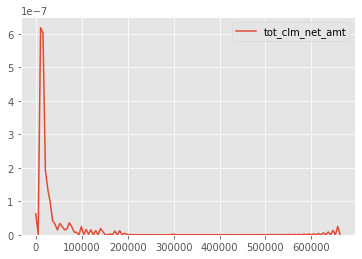

In [13]:
sns.kdeplot(data['tot_clm_net_amt'][data['det_Action_Type'] == 'A'])

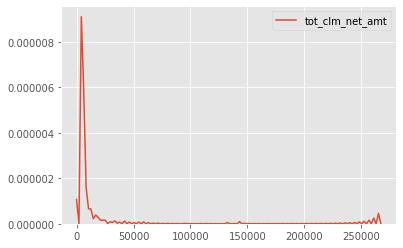

In [14]:
sns.kdeplot(data['tot_clm_net_amt'][data['det_Action_Type'] == 'N'])

In [68]:
data['tot_clm_net_amt'][data['det_Action_Type'] == 'A'].mean(),data['tot_clm_net_amt'][data['det_Action_Type'] == 'N'].mean()

(1561.0821769654008, 1032.0524748970447)

In [38]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()

In [43]:
x1 = scaler.fit_transform(pd.DataFrame(data['tot_clm_net_amt'].dropna()[data['det_Action_Type'] == 'A']))

In [44]:
x2 = scaler.fit_transform(pd.DataFrame(data['tot_clm_net_amt'].dropna()[data['det_Action_Type'] == 'N']))

In [57]:
stests.ztest(x1,x2,value=0,alternative='smaller')

(array([-3.75817739e-14]), array([0.5]))

In [67]:
stests.CompareMeans.from_data(x1,x2).ztest_ind(value=np.mean(x2)-np.mean(x1),alternative='smaller')

(array([-2.07420516e-13]), array([0.5]))

In [66]:
np.mean(x2),np.mean(x1)

(-4.9939180303857626e-17, -1.1837713632559396e-16)

In [77]:
from scipy.stats import chi2_contingency

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
LE = LabelEncoder()

In [ ]:
data.det_Action_Type = data.det_Action_Type.apply(lambda x : str(x))

In [90]:
LE_Action = LE.fit_transform(data.det_Action_Type)

In [91]:
pd.crosstab(data['provider_id'],data['det_Action_Type'])

det_Action_Type,A,N,None,S
provider_id,,,,
-1,0,0,0,19
22129,2,7,0,0
23031,35,2,0,0
23033,14,2,0,0
30218,306,233,0,2
...,...,...,...,...
8638,574,124,0,0
9013,1271,494,0,0
9062,19,22,0,0


In [92]:
chi2_contingency(pd.crosstab(data['provider_id'],data['det_Action_Type']))

(146118.43220497924,
 0.0,
 3261,
 array([[1.46485654e+01, 4.34464686e+00, 1.06894107e-05, 6.77708640e-03],
        [6.93879412e+00, 2.05799062e+00, 5.06340508e-06, 3.21019882e-03],
        [2.85261536e+01, 8.46062809e+00, 2.08162209e-05, 1.31974841e-02],
        ...,
        [3.16100621e+01, 9.37529058e+00, 2.30666232e-05, 1.46242391e-02],
        [2.85261536e+01, 8.46062809e+00, 2.08162209e-05, 1.31974841e-02],
        [9.71431177e+01, 2.88118686e+01, 7.08876712e-05, 4.49427835e-02]]))

In [142]:
top20providers = data.provider_id.value_counts()[:20].index.to_list()

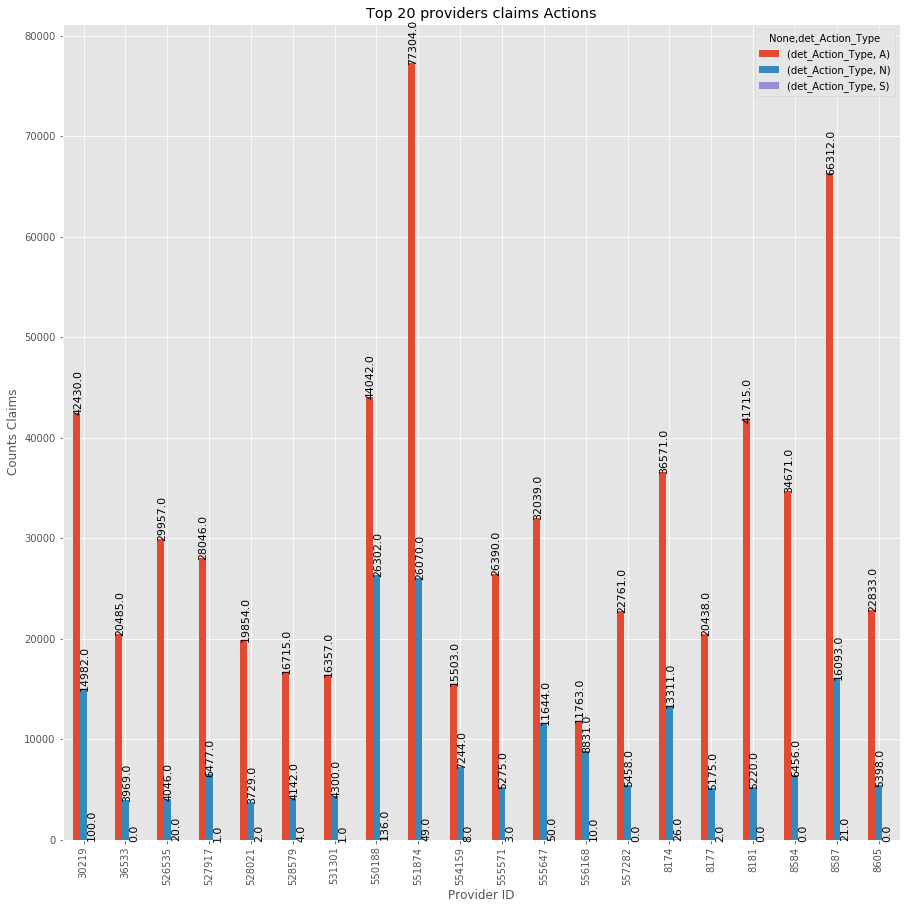

In [143]:
ax = pd.DataFrame(data[data.provider_id.isin(top20providers)].groupby(['provider_id','det_Action_Type'])['det_Action_Type'].count()).unstack().plot.bar()
plt.gcf().set_size_inches(15,15)
for p in ax.patches:
    ax.annotate(p.get_height().round(2),(p.get_x(),p.get_height()),rotation=90,ha='left',fontsize=11)
    plt.ylabel('Counts Claims')
plt.xlabel('Provider ID')
plt.title('Top 20 providers claims Actions')
plt.show()

In [136]:
(data.provider_id[data.det_Action_Type == 'N'].value_counts()/data.provider_id.value_counts()).sort_values(ascending=False)

528500    1.0
531398    1.0
531300    1.0
557227    1.0
557236    1.0
         ... 
557537    NaN
557556    NaN
557567    NaN
557572    NaN
59446     NaN
Name: provider_id, Length: 1088, dtype: float64

In [145]:
chi2_contingency(pd.crosstab(data['thread_id'],data['det_Action_Type']))

(577994.6656402885,
 0.0,
 81,
 array([[4.17283659e+04, 1.23762982e+04, 3.04501930e-02, 1.93054223e+01],
        [4.13945328e+04, 1.22772860e+04, 3.02065869e-02, 1.91509761e+01],
        [1.06572168e+04, 3.16084492e+03, 7.77682761e-03, 4.93050870e+00],
        [5.31511630e+03, 1.57642081e+03, 3.87856829e-03, 2.45901230e+00],
        [5.08120184e+04, 1.50704366e+04, 3.70787528e-02, 2.35079293e+01],
        [4.95992714e+04, 1.47107456e+04, 3.61937821e-02, 2.29468579e+01],
        [3.31489325e+04, 9.83170717e+03, 2.41895739e-02, 1.53361898e+01],
        [4.53874233e+03, 1.34615453e+03, 3.31202953e-03, 2.09982672e+00],
        [9.38279161e+03, 2.78286064e+03, 6.84684887e-03, 4.34090219e+00],
        [1.21606222e+04, 3.60674289e+03, 8.87389871e-03, 5.62605178e+00],
        [1.46485654e+01, 4.34464686e+00, 1.06894107e-05, 6.77708640e-03],
        [7.39381711e+05, 2.19294678e+05, 5.39544631e-01, 3.42071296e+02],
        [8.39378215e+04, 2.48952838e+04, 6.12514487e-02, 3.88334185e+01],
       